<a href="https://colab.research.google.com/github/Jyotirana2608/Loan-Prediction-Python-and-Machine-Learning-Project/blob/main/Loan_Prediction_Python_and_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Loan Dataset.xlsx")

In [ ]:
df.head()   # it shows first 5 rows of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.tail()    # it shows last 5 rows of data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

In [ ]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum()    # will tell null count of each column

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


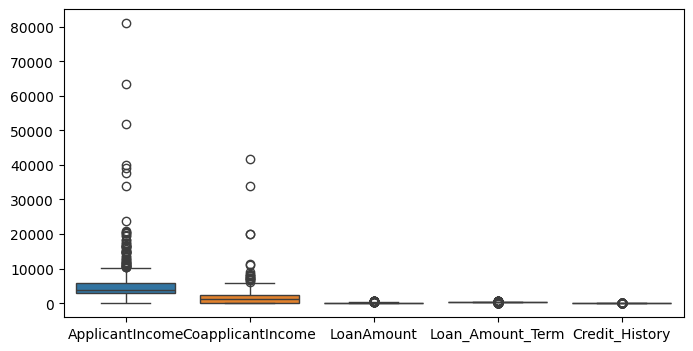

In [ ]:
# check the outliers

plt.figure(figsize=(8,4))
sns.boxplot(data=df)
plt.show()

In [ ]:
# fill the null values of numerical datatype

df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [ ]:
# fill the null values of object datatype

df['Gender']= df['Married'].fillna(df['Married'].mode()[0])
df['Married']= df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']= df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']= df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Number of people who took loan by gender
Gender
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

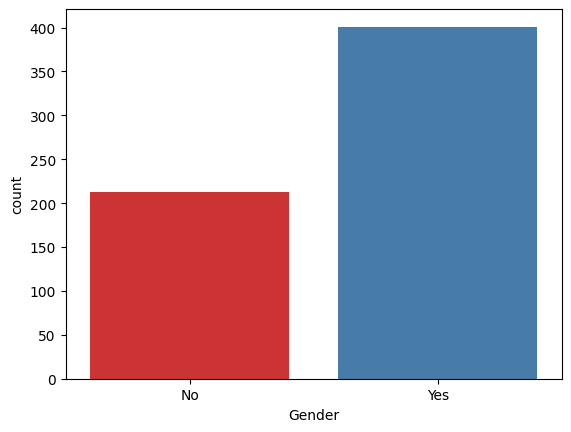

In [ ]:
print('Number of people who took loan by gender')
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data= df, palette= 'Set1')

Number of people who took loan by Married
Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

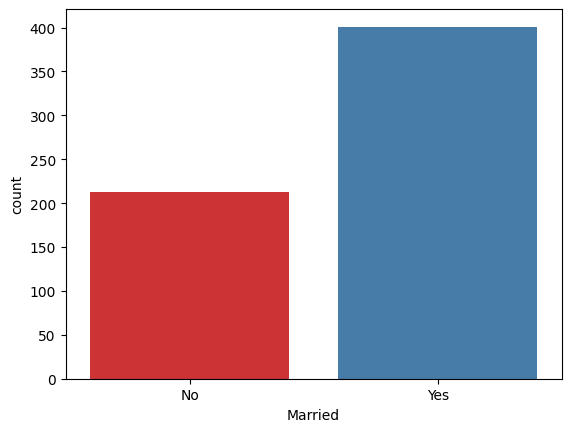

In [ ]:
print('Number of people who took loan by Married')
print(df['Married'].value_counts())
sns.countplot(x='Married',data = df, palette = 'Set1')

Number of people who took loan by Education
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

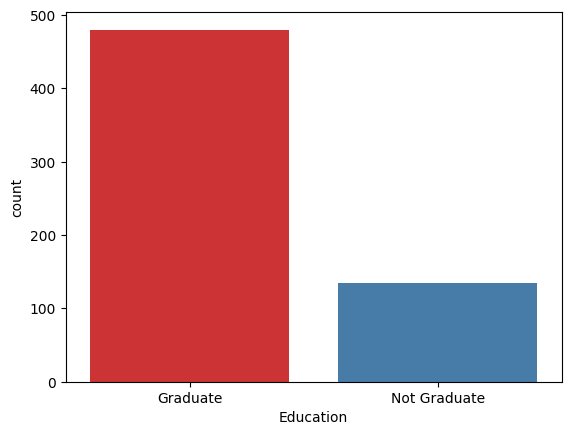

In [ ]:
print('Number of people who took loan by Education')
print(df['Education'].value_counts())
sns.countplot(x='Education',data = df, palette = 'Set1')

In [ ]:
numeric_df = df.select_dtypes(include=np.number)
corr=numeric_df.corr()
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.045242,-0.014477
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059675,-0.001665
LoanAmount,0.565181,0.189218,1.000000,0.039235,-0.007031
Loan_Amount_Term,-0.045242,-0.059675,0.039235,1.000000,0.001395
Credit_History,-0.014477,-0.001665,-0.007031,0.001395,1.000000


<Axes: >

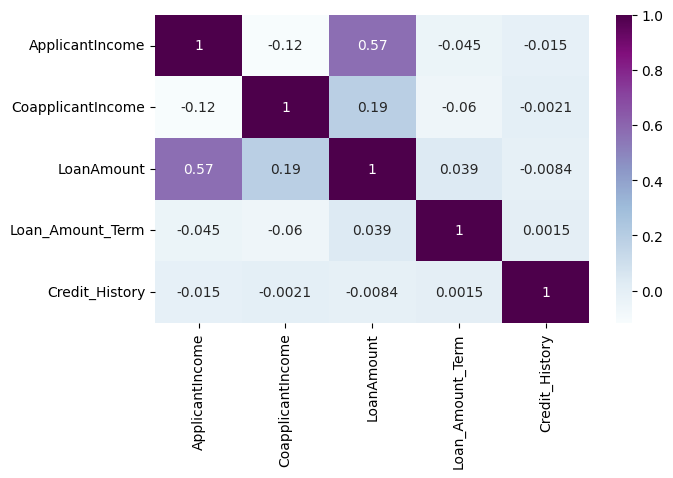

In [ ]:
plt.figure(figsize=(7,4))
sns.heatmap(corr,annot=True,cmap='BuPu')

In [ ]:
## creating a new column total applicant income
df['Total_Income']= df['ApplicantIncome'] + df['CoapplicantIncome']
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,No,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Yes,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Yes,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Yes,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,No,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [ ]:
## apply log transformation--Log transformation is commonly used in data preprocessing to reduce skewness, handle outliers, and make data more normally distributed

df['ApplicantIncomelog'] = np.log(df['ApplicantIncome'] +1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog
0,LP001002,No,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197
1,LP001003,Yes,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327
2,LP001005,Yes,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701
3,LP001006,Yes,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094
4,LP001008,No,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681


<Axes: xlabel='ApplicantIncomelog', ylabel='Density'>

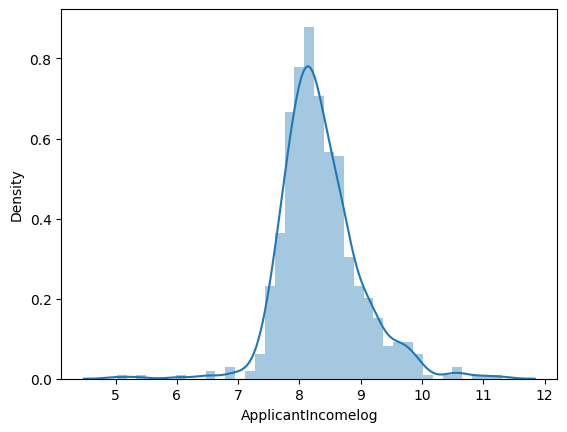

In [ ]:
sns.distplot(df['ApplicantIncomelog'])

In [ ]:
df['LoanAmountlog'] = np.log(df['LoanAmount'] +1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog
0,LP001002,No,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812
1,LP001003,Yes,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812
2,LP001005,Yes,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693
3,LP001006,Yes,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791
4,LP001008,No,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827


<Axes: xlabel='LoanAmountlog', ylabel='Density'>

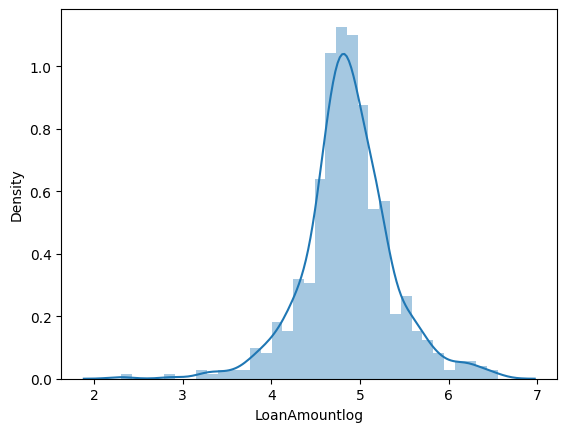

In [ ]:
sns.distplot(df['LoanAmountlog'])

In [ ]:
df['Loan_Amount_TermLog'] = np.log(df['Loan_Amount_Term'] + 1)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog
0,LP001002,No,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878
1,LP001003,Yes,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878
2,LP001005,Yes,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878
3,LP001006,Yes,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878
4,LP001008,No,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878


<Axes: xlabel='Loan_Amount_TermLog', ylabel='Density'>

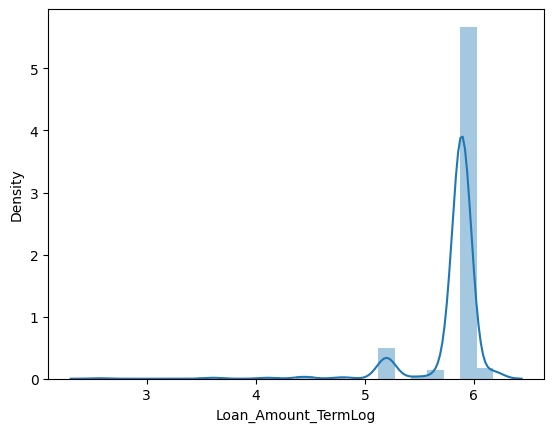

In [ ]:
sns.distplot(df['Loan_Amount_TermLog'])

<Axes: xlabel='Total_IncomeLog', ylabel='Density'>

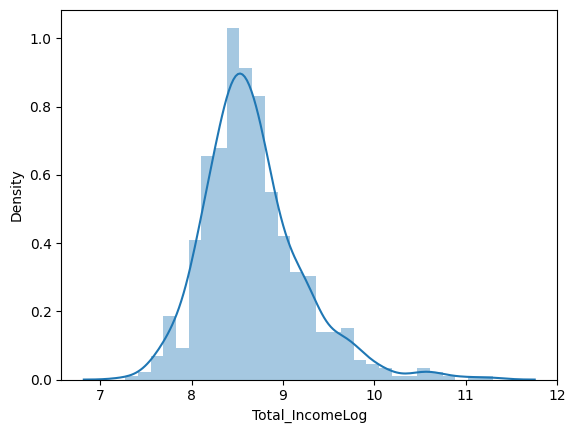

In [ ]:
df['Total_IncomeLog'] = np.log(df['Total_Income'] + 1)
sns.distplot(df['Total_IncomeLog'])

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog,Total_IncomeLog
0,LP001002,No,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,8.674197,NaN,5.888878,8.674197
1,LP001003,Yes,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,LP001005,Yes,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,LP001006,Yes,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,LP001008,No,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [ ]:
## Drop unnecessary columns
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total_Income','Loan_ID']
df = df.drop(columns = cols,axis=1)

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog,Total_IncomeLog
0,No,No,0,Graduate,No,1.0,Urban,Y,8.674197,NaN,5.888878,8.674197
1,Yes,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Yes,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Yes,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,No,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [ ]:
# encoding for categorical columns = Label Encoding

from sklearn.preprocessing import LabelEncoder

cols = ['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

for col in cols:
    df[col] = df[col].astype(str)         ## Convert all values to string
    df[col] = le.fit_transform(df[col])


In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog,Total_IncomeLog
0,0,0,0,0,0,1.0,2,1,8.674197,NaN,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,0,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [ ]:
df.dtypes

,0
Gender,int64
Married,int64
Dependents,int64
Education,int64
Self_Employed,int64
Credit_History,float64
Property_Area,int64
Loan_Status,int64
ApplicantIncomelog,float64
LoanAmountlog,float64


In [ ]:
## split independent and dependent features

x = df.drop(columns = ['Loan_Status'],axis=1)
y = df['Loan_Status']

In [ ]:
x

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog,Total_IncomeLog
0,0,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,0,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [ ]:
y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
# creating a machine learning model

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model1)

In [ ]:
accuracy*100

77.27272727272727

In [ ]:
##accuracy : the ratio of the correctly predicted values to the the total values

In [ ]:
score = cross_val_score(model1,x,y,cv=5)
score

array([0.81300813, 0.7804878 , 0.7804878 , 0.85365854, 0.81967213])

In [ ]:
np.mean(score)*100

np.float64(80.9462881514061)

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model2)
print("Accuracy score of Decision Tree model: ", accuracy*100)

Accuracy score of Decision Tree model:  72.72727272727273


In [ ]:
score = cross_val_score(model2,x,y,cv=5)
score

array([0.6504065 , 0.70731707, 0.67479675, 0.69105691, 0.71311475])

In [ ]:
np.mean(score)*100

np.float64(68.73383979741436)

In [ ]:
# Random Classifier

model3 = RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_pred_model3,y_test)
print("Accuracy score of Random Forest model :",accuracy*100)

Accuracy score of Random Forest model : 80.51948051948052


In [ ]:
## Kneighbor model

model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4=model4.predict(x_test)
accuracy = accuracy_score(y_test,y_pred_model4)
print("Accuracy score of Kneighbors model:",accuracy*100)

Accuracy score of Kneighbors model: 69.48051948051948


In [ ]:
score = cross_val_score(model4,x,y,cv=3)
print("Cross validation of Knearest neighbor:",np.mean(score)*100)

Cross validation of Knearest neighbor: 73.29188586003507


In [ ]:
from sklearn.metrics import classification_report
def generate_classification_report(model_name, y_test, y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report for {model_name}:\n{report}\n")

generate_classification_report(model1,y_test,y_pred_model1)
generate_classification_report(model2,y_test,y_pred_model2)
generate_classification_report(model3,y_test,y_pred_model3)
generate_classification_report(model4,y_test,y_pred_model4)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.62      0.57      0.60        54
           1       0.78      0.81      0.79       100

    accuracy                           0.73       154
   macro avg       0.70      0.69      0.70       154
weighted avg       0.72      0.73      0.72       154


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.88      0.52      0.65        54
           1       0.79      0.96      0.86       100

    accuracy                

In [ ]:
df['Loan_Status'].value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
pip install -U imbalanced-learn

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
oversample = RandomOverSampler(random_state=42)
x_resampled,y_resampled = oversample.fit_resample(x,y)

df_resampled=pd.concat([pd.DataFrame(x_resampled,columns= x.columns),pd.Series(y_resampled,name="Loan_status")],axis=1)

In [ ]:
x_resampled

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncomelog,LoanAmountlog,Loan_Amount_TermLog,Total_IncomeLog
0,0,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,0,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [ ]:
y_resampled

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
839,0
840,0
841,0
842,0


In [ ]:
y_resampled.value_counts()

,count
Loan_Status,
1,422
0,422


In [ ]:
x_resampled_train,x_resampled_test,y_resampled_train,y_resampled_test = train_test_split(x_resampled,y_resampled,test_size = 0.25,random_state=42)

In [ ]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(x_resampled_train,y_resampled_train)
y_pred_model1 = model1.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model1)
accuracy*100

69.19431279620854

In [ ]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(x_resampled_train,y_resampled_train)
y_pred_model2 = model2.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model2)
print("Accuracy score of Decision Tree model:",accuracy*100)

Accuracy score of Decision Tree model: 80.09478672985783


In [ ]:
## Kneighbor model

model4 = KNeighborsClassifier(n_neighbors = 3)
model4.fit(x_resampled_train,y_resampled_train)
y_pred_model4=model4.predict(x_resampled_test)
accuracy = accuracy_score(y_resampled_test,y_pred_model4)
print("Accuracy score of Kneighbors model:",accuracy*100)

Accuracy score of Kneighbors model: 73.45971563981043


In [ ]:
## Random Classifier

model3 = RandomForestClassifier()
model3.fit(x_resampled_train,y_resampled_train)
y_pred_model3 = model3.predict(x_resampled_test)
accuracy = accuracy_score(y_pred_model3,y_resampled_test)
print("Accuracy score of Random Forest model :",accuracy*100)

Accuracy score of Random Forest model : 88.62559241706161


In [ ]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report for {model_name}:\n{report}\n")

generate_classification_report(model1,y_resampled_test,y_pred_model1)
generate_classification_report(model2,y_resampled_test,y_pred_model2)
generate_classification_report(model3,y_resampled_test,y_pred_model3)
generate_classification_report(model4,y_resampled_test,y_pred_model4)

Classification Report for LogisticRegression():
              precision    recall  f1-score   support

           0       0.85      0.53      0.65       114
           1       0.61      0.89      0.73        97

    accuracy                           0.69       211
   macro avg       0.73      0.71      0.69       211
weighted avg       0.74      0.69      0.68       211


Classification Report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.79      0.87      0.82       114
           1       0.82      0.72      0.77        97

    accuracy                           0.80       211
   macro avg       0.80      0.80      0.80       211
weighted avg       0.80      0.80      0.80       211


Classification Report for RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       114
           1       0.85      0.91      0.88        97

    accuracy                